In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv(r'C:\Users\suved\OneDrive\Desktop\AVV\corizo\stockpp.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1009, 1)

In [9]:
X_train = []
y_train = []

# Get the length of trainData
length = len(trainData)

for i in range(60, length): #60 : timestep // length : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


In [10]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(949, 60, 1)

In [12]:
from keras.layers import Input

model = Sequential()

model.add(Input(shape=(X_train.shape[1],1)))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


In [13]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
30/30 - 23s - 770ms/step - loss: 0.0300
Epoch 2/20
30/30 - 7s - 220ms/step - loss: 0.0070
Epoch 3/20
30/30 - 6s - 210ms/step - loss: 0.0058
Epoch 4/20
30/30 - 6s - 211ms/step - loss: 0.0057
Epoch 5/20
30/30 - 6s - 211ms/step - loss: 0.0054
Epoch 6/20
30/30 - 6s - 212ms/step - loss: 0.0067
Epoch 7/20
30/30 - 7s - 222ms/step - loss: 0.0064
Epoch 8/20
30/30 - 6s - 215ms/step - loss: 0.0063
Epoch 9/20
30/30 - 7s - 218ms/step - loss: 0.0049
Epoch 10/20
30/30 - 6s - 213ms/step - loss: 0.0043
Epoch 11/20
30/30 - 6s - 215ms/step - loss: 0.0047
Epoch 12/20
30/30 - 6s - 213ms/step - loss: 0.0040
Epoch 13/20
30/30 - 6s - 214ms/step - loss: 0.0045
Epoch 14/20
30/30 - 6s - 215ms/step - loss: 0.0043
Epoch 15/20
30/30 - 7s - 220ms/step - loss: 0.0039
Epoch 16/20
30/30 - 7s - 220ms/step - loss: 0.0034
Epoch 17/20
30/30 - 7s - 221ms/step - loss: 0.0035
Epoch 18/20
30/30 - 6s - 216ms/step - loss: 0.0033
Epoch 19/20
30/30 - 6s - 213ms/step - loss: 0.0034
Epoch 20/20
30/30 - 6s - 216ms/step - l

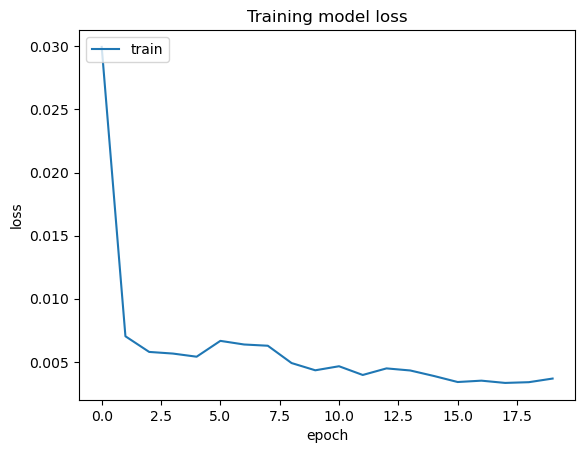

In [14]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [16]:
testData = pd.read_csv(r'C:\Users\suved\OneDrive\Desktop\AVV\corizo\stockpp.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(949, 60, 1)

In [17]:
y_pred = model.predict(X_test)
y_pred

30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step


array([[0.18634574],
       [0.18095379],
       [0.17683269],
       [0.17447676],
       [0.17438656],
       [0.17661285],
       [0.18090902],
       [0.18663457],
       [0.19280022],
       [0.1986243 ],
       [0.20344426],
       [0.20701082],
       [0.209175  ],
       [0.20994158],
       [0.20993032],
       [0.20973581],
       [0.21045408],
       [0.21295667],
       [0.21751092],
       [0.22363998],
       [0.23071405],
       [0.23787908],
       [0.24483603],
       [0.25146294],
       [0.25780815],
       [0.26388034],
       [0.26917726],
       [0.27319235],
       [0.275733  ],
       [0.27701938],
       [0.27833906],
       [0.28138694],
       [0.28686625],
       [0.294378  ],
       [0.30380878],
       [0.31530473],
       [0.32827917],
       [0.3413485 ],
       [0.35145932],
       [0.35756582],
       [0.3592937 ],
       [0.35747507],
       [0.3531497 ],
       [0.34786558],
       [0.34244552],
       [0.33788878],
       [0.33541936],
       [0.336

In [18]:
predicted_price = sc.inverse_transform(y_pred)

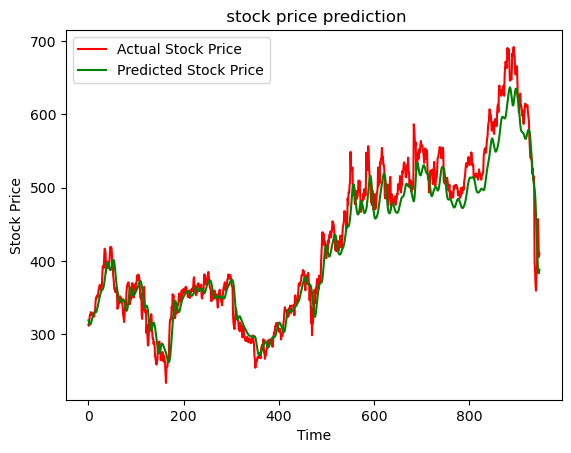

In [20]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title(' stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()